In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

(100, 1)
(100, 1)


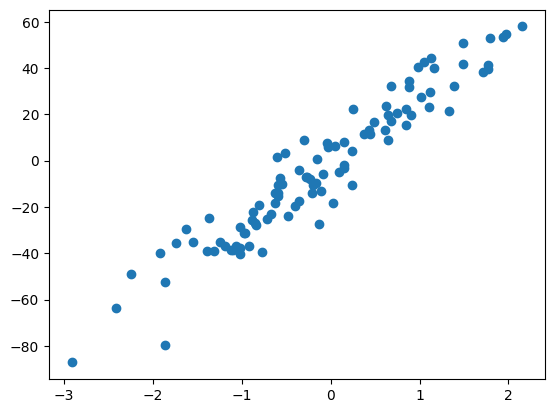

In [2]:
X, Y = make_regression(100, n_features = 1, n_targets = 1, noise = 10, random_state = 3)
Y = Y.reshape((100, 1))
print(X.shape)
print(Y.shape)
plt.scatter(X, Y)

In [3]:
import Layer

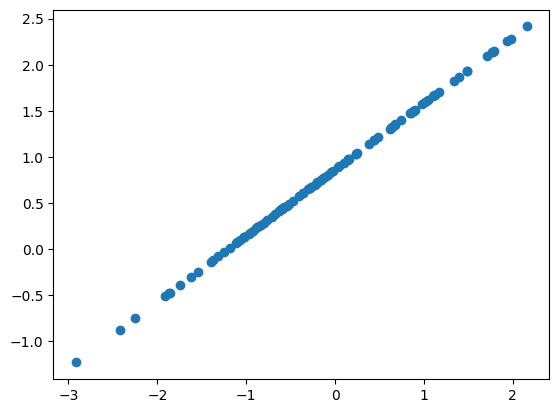

In [4]:
l1 = Layer.Linear(1, 1)
out = l1(X)
plt.scatter(X, out)

### 測試多層Linear的效果

In [5]:
l1 = Layer.Linear(1, 5)
relu1 = Layer.Relu()
l2 = Layer.Linear(5, 1)

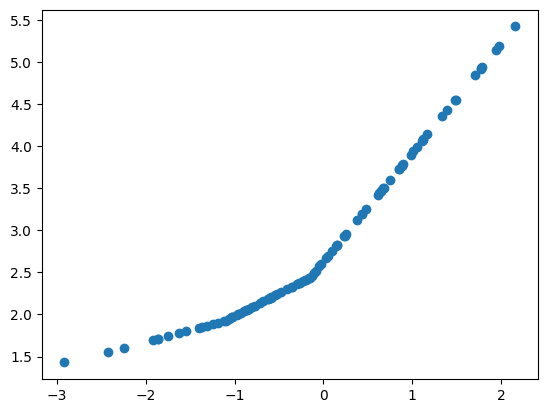

In [6]:
out = l1(X)
out = relu1(out)
out = l2(out)

plt.scatter(X, out)

In [7]:
learningRate = 0.01

### 實作反向傳播

In [13]:
def backward(dz: np.ndarray, layer, layerIn: np.ndarray) -> np.ndarray:
    # w的梯度
    gw = layerIn.T.dot(dz)
    # b的梯度
    gb = np.sum(dz, axis = 0, keepdims = True)
    new_dz = dz.dot(layer.weight.T)
    # print(gw)
    # print(gb)
    layer.weight -= learningRate * gw
    layer.bias -= learningRate * gb
    return new_dz

### 訓練

854.6954444200537
644.297207211997
340.02112818973495
109.17459739309612
81.97713697566296
81.00786411494852
80.85397901702503
80.8271200294661
80.82210280371609
80.82113823613211
80.82095056781127
80.8209138706403
80.82090668038286
80.82090527039823
80.82090499381373
80.8209049395512
80.82090492890498
80.82090492681617
80.82090492640633
80.82090492632592
80.82090492631013
80.82090492630704
80.82090492630644
80.82090492630631
80.8209049263063
80.8209049263063
80.82090492630627
80.82090492630628
80.82090492630628
80.82090492630628
80.82090492630627
80.82090492630628
80.82090492630628
80.8209049263063
80.8209049263063
80.8209049263063
80.82090492630627
80.82090492630627
80.8209049263063
80.8209049263063
80.82090492630627
80.82090492630628
80.82090492630628
80.82090492630628
80.82090492630628
80.82090492630628
80.82090492630627
80.82090492630627
80.82090492630627
80.82090492630627


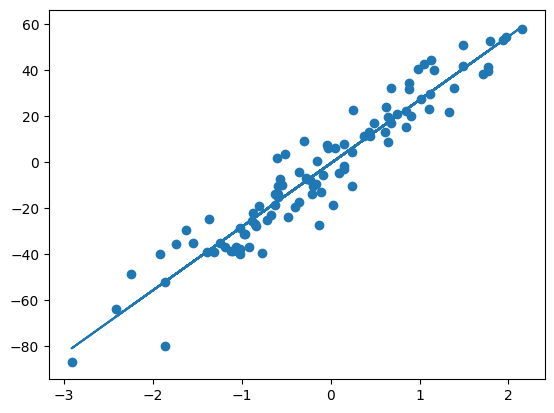

In [14]:
l1 = Layer.Linear(1, 10)
l2 = Layer.Linear(10, 1)

for i in range(50):
    # forward pass
    out1 = l1(X)
    out2 = l2(out1)
    
    # 計算誤差，用MSE
    loss = np.mean(np.square(out2 - Y))
    print(loss)
    
    # backward pass
    dz2 = 2 * (out2 - Y) / out2.shape[0] # MES的導數
    dz1 = backward(dz2, l2, out1)
    _ = backward(dz1, l1, X)
    
# 跑跑看效果
out1 = l1(X)
prediction = l2(out1)
plt.plot(X, prediction)
plt.scatter(X, Y)
plt.show()

### 加入Relu後

891.5552093253447
804.6908428237066
716.477877452799
639.3429522411784
599.2391997427857
581.9123925949746
562.546686021968
539.4673821085031
512.8866391045888
478.17093101533976
426.4913304148594
349.6792419226277
255.5447815593556
174.36186850327402
130.47188085816452
112.84691080975776
102.920752491323
96.31855659770179
90.9115244584402
93.1110499748564
111.28569911890985
184.49886171087905
342.09486615766326
520.2590674000618
117.15758029115567
90.63691956275416
89.18800845788417
88.48360176656165
88.04662712517985
87.75917604898282
87.56302684128343
87.41116144123049
87.22477917373978
87.07137356515251
86.87494371324155
86.57317425395844
86.31297285011888
86.07880693788415
85.86241167961009
85.66447278613718
85.47484078557862
85.25885887631259
85.06962273043924
84.90908564675595
84.77703654988458
84.65817617488997
84.55406561343909
84.4597342489764
84.29339028784938
84.0515259250872


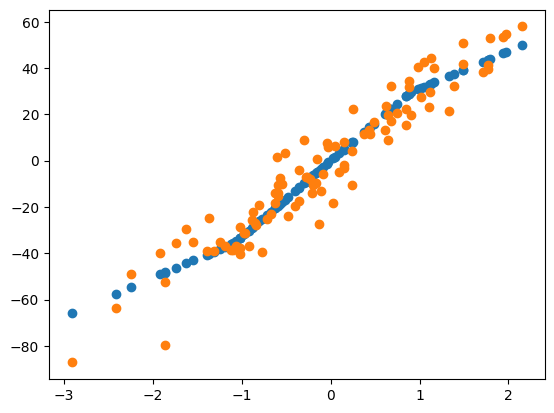

In [19]:
l1 = Layer.Linear(1, 10)
relu1 = Layer.Relu()
l2 = Layer.Linear(10, 1)

for i in range(50):
    # forward pass
    out1 = l1(X)
    a1 = relu1(out1)
    out2 = l2(a1)
    
    # 計算誤差，用MSE
    loss = np.mean(np.square(out2 - Y))
    print(loss)
    
    # backward pass
    dz2 = 2 * (out2 - Y) / out2.shape[0] # MES的導數
    dz1 = backward(dz2, l2, out1)
    dz1 *= relu1.derivative(out1)
    _ = backward(dz1, l1, X)
    
# 跑跑看效果
out1 = l1(X)
a1 = relu1(out1)
prediction = l2(a1)
plt.scatter(X, prediction)
plt.scatter(X, Y)
plt.show()